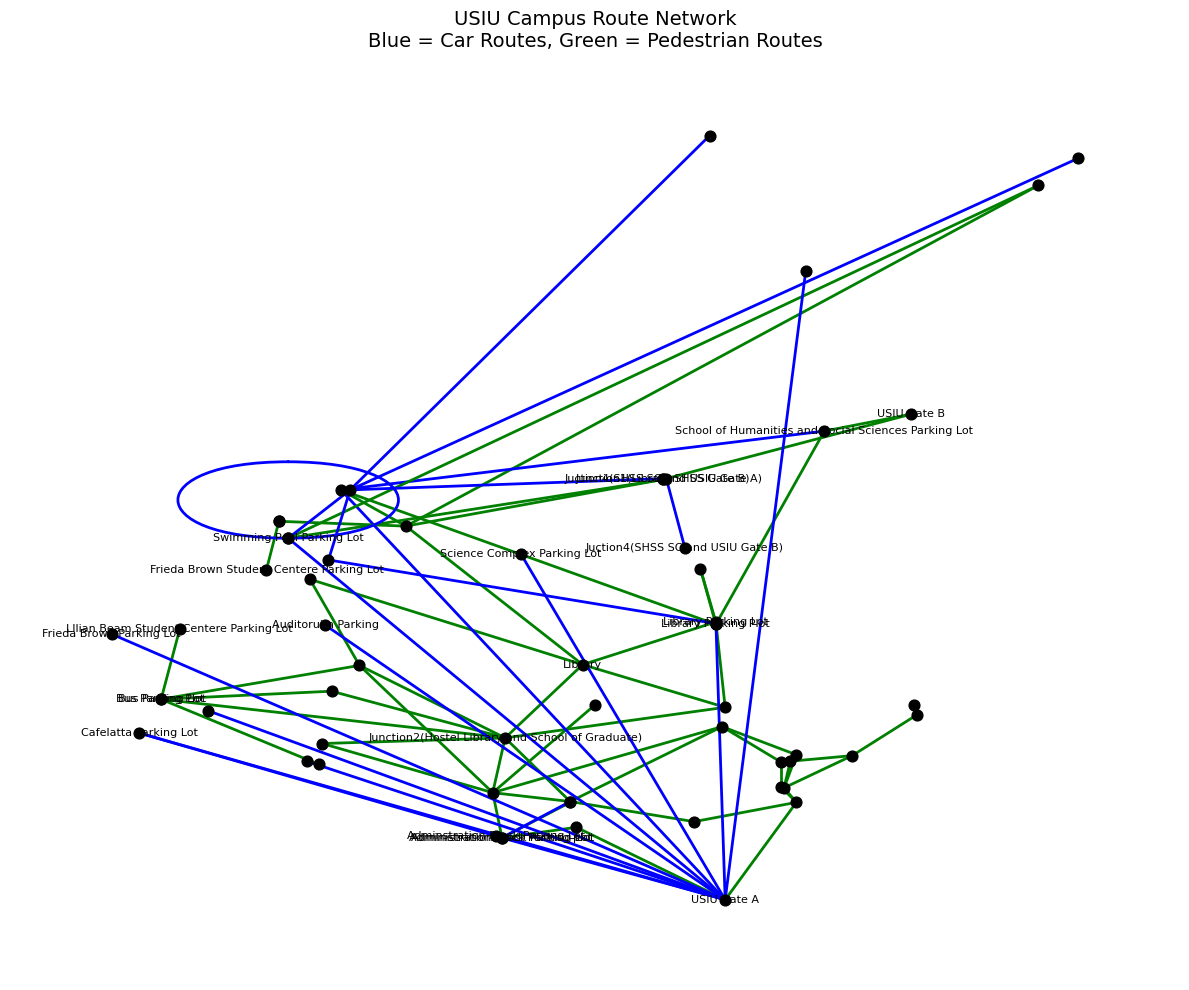

In [7]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# === Load Combined GeoJSON ===
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Desktop\USIU MAp Project\combined\combined_routes_named.geojson"
gdf = gpd.read_file(file_path)

# === Build Graph ===
G = nx.Graph()
for _, row in gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    coords = list(row.geometry.coords)
    start_coord = coords[0]
    end_coord = coords[-1]
    
    G.add_node(start, pos=start_coord)
    G.add_node(end, pos=end_coord)
    G.add_edge(start, end, weight=row.geometry.length, type=row["type"], geometry=row.geometry)

# === Extract node positions ===
pos = nx.get_node_attributes(G, 'pos')

# === Prepare edge colors ===
edge_colors = [
    'blue' if G[u][v]['type'] == 'car' else 'green'
    for u, v in G.edges
]

# === Draw Graph ===
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=60, node_color='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Optional: draw labels for major locations
important_nodes = [n for n in G.nodes if "Parking" in n or "Library" in n or "Gate" in n]
nx.draw_networkx_labels(G, pos, labels={n: n for n in important_nodes}, font_size=8)

plt.title("USIU Campus Route Network\nBlue = Car Routes, Green = Pedestrian Routes", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


#### What we saw is this
🟢 Green paths = Pedestrian

🔵 Blue paths = Car

⚫ Small black dots = locations (nodes)

🏷️ Labels = Gates, Parking, Library, etc.

### Available Nodes

In [8]:
print("📌 All available nodes in the graph:")
for node in sorted(G.nodes):
    print(f"- {node}")


📌 All available nodes in the graph:
- Administration Block
- Administration Block Parking Lot
- Administration Block Parking plot
- Administration Sitting Area
- Adminstration Block Parking Lot
- Auditorium
- Auditoruim Parking
- Back of Science Complex
- Basketball Court
- Bus Paking Lot
- Bus Parking Lot
- Bus Parking Plot
- C and D Lecture Halls
- Cafelatta Parking Lot
- Chandaria School of Business
- E and F Lecture Halls
- E-learning Resource Center
- Football Pitch
- Football and Rugby Feild
- Frieda Brown Parking Lot
- Frieda Brown Student Centere
- Frieda Brown Student Centere Parking Lot
- Hostel
- Hostels(Cafelatta)
- I & J Lecture Halls
- I and J Lecture Halls
- Juction4(SHSS SC and USIU Gate A)
- Juction4(SHSS SC and USIU Gate B)
- Junction1(Library SHSS Gate B)
- Junction2(Hostel Library and School of Graduate)
- Junction3(SHSS FIeld Sport and SC)
- Junction5(Freida Brown and Science Complex)
- K & L Lecture Halls
- LIlian Beam Student Centere
- LIlian Beam Student Centere

###  Highlight a Path A ➝ B

✅ Shortest Path:
 1. Administration Block Parking Lot
 2. Paul's Caffe
 3. Lilian Beam (ICT Centere)
 4. Junction2(Hostel Library and School of Graduate)
 5. Library
 6. Library Parking Lot


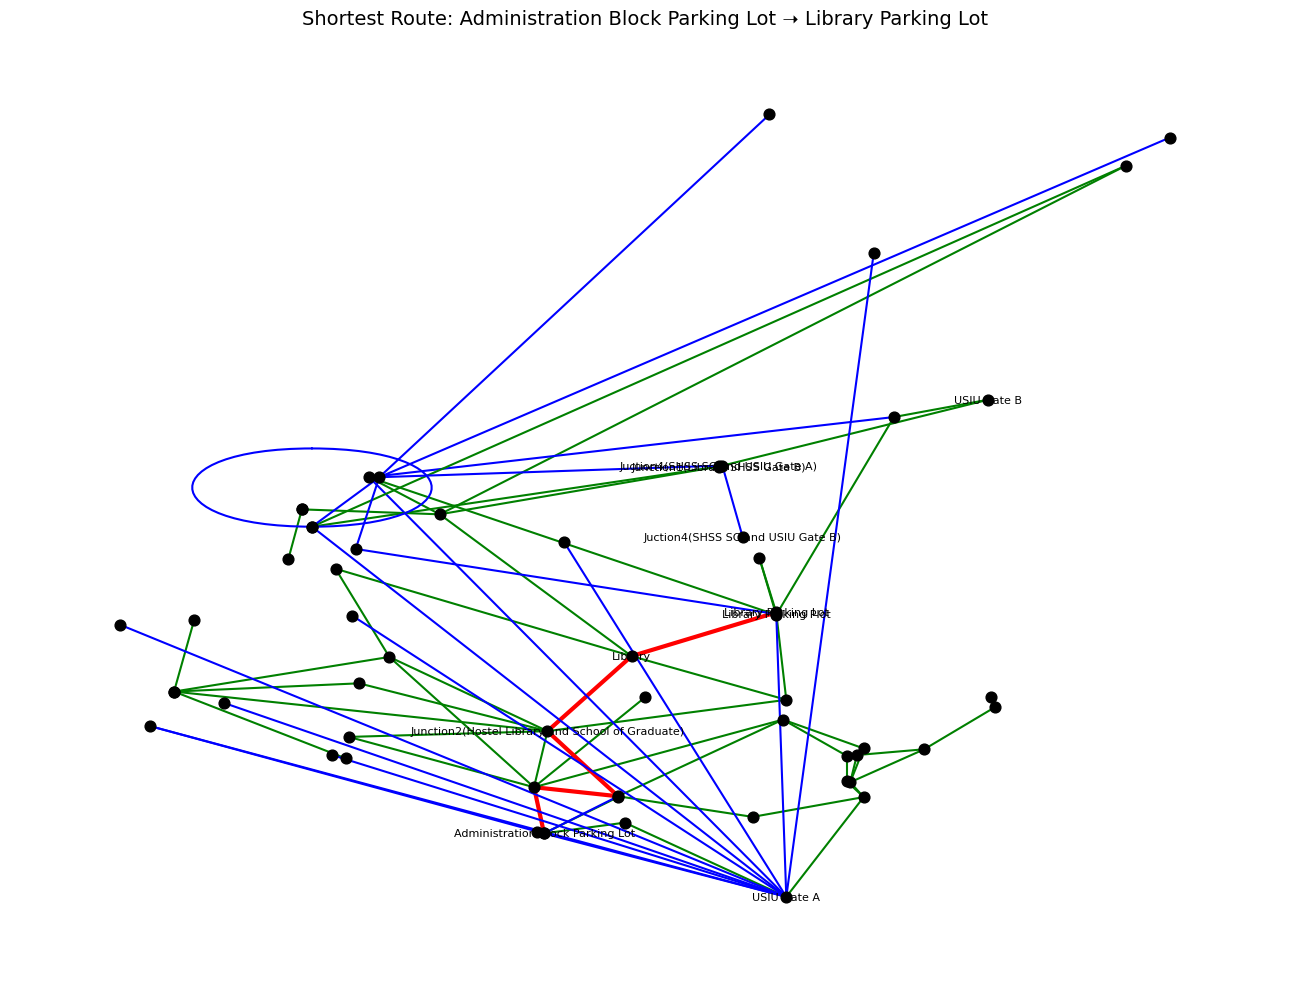

In [15]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# === Load GeoJSON ===
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Desktop\USIU MAp Project\combined\combined_routes_named.geojson"
gdf = gpd.read_file(file_path)

# === Build Graph ===
G = nx.Graph()
for _, row in gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    coords = list(row.geometry.coords)
    start_coord = coords[0]
    end_coord = coords[-1]

    G.add_node(start, pos=start_coord)
    G.add_node(end, pos=end_coord)
    G.add_edge(start, end, weight=row.geometry.length, type=row["type"], geometry=row.geometry)
    

# === Input your desired route ===
start_node = "Administration Block Parking Lot"  # 🔁 Change this
end_node = "Library Parking Lot"                 # 🔁 Change this

# === Compute shortest path ===
if nx.has_path(G, start_node, end_node):
    shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
    print("✅ Shortest Path:")
    for i, node in enumerate(shortest_path):
        print(f" {i+1}. {node}")
else:
    print("❌ No route found between selected nodes.")
    exit()

# === Visualization ===
pos = nx.get_node_attributes(G, 'pos')
edge_colors = []
edge_widths = []

for u, v in G.edges:
    if (u in shortest_path and v in shortest_path and
        abs(shortest_path.index(u) - shortest_path.index(v)) == 1):
        edge_colors.append("red")  # 🔺 Highlight route
        edge_widths.append(3)
    else:
        edge_colors.append("green" if G[u][v]['type'] == 'pedestrian' else "blue")
        edge_widths.append(1.5)

plt.figure(figsize=(13, 10))
nx.draw_networkx_nodes(G, pos, node_size=60, node_color='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)

# Optional: Label major nodes
important_nodes = [start_node, end_node] + [n for n in G.nodes if "Gate" in n or "Library" in n]
nx.draw_networkx_labels(G, pos, labels={n: n for n in important_nodes}, font_size=8)

plt.title(f"Shortest Route: {start_node} ➝ {end_node}", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:
import matplotlib.pyplot as plt

# === Choose start and end locations (must match cleaned names!) ===
start_node = "Administration Block"
end_node = "Library Parking Lot"

# === Find shortest path ===
if nx.has_path(G, start_node, end_node):
    shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight="weight")
    print("✅ Shortest path found:\n")
    for i, node in enumerate(shortest_path):
        print(f"{i+1}. {node}")
else:
    print("❌ No path found between the selected nodes.")


✅ Shortest path found:

1. Administration Block
2. Administration Block Parking Lot
3. Paul's Caffe
4. Lilian Beam (ICT Centere)
5. Junction2(Hostel Library and School of Graduate)
6. Library
7. Library Parking Lot


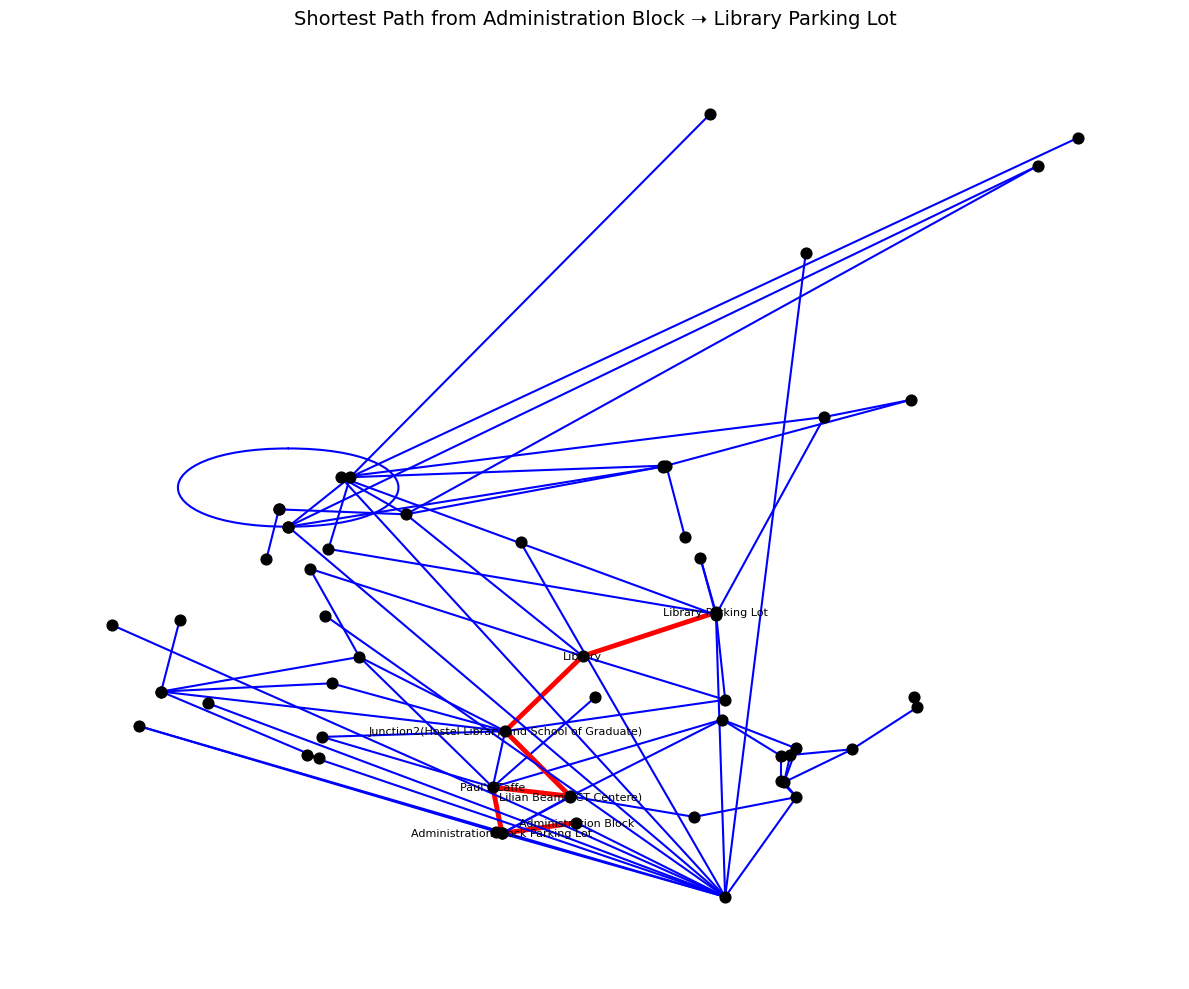

In [12]:
# === Get node positions for plotting ===
pos = nx.get_node_attributes(G, 'pos')

# === Highlight edges in the shortest path ===
edge_colors = []
edge_widths = []

for u, v in G.edges:
    if (u in shortest_path and v in shortest_path and
        abs(shortest_path.index(u) - shortest_path.index(v)) == 1):
        edge_colors.append("red")      # Highlight selected path
        edge_widths.append(3.5)
    else:
        route_type = G[u][v].get("route_type", "unknown")
        edge_colors.append("green" if route_type == "pedestrian" else "blue")
        edge_widths.append(1.5)

# === Draw graph ===
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=60)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)

# Draw start and end node labels
nx.draw_networkx_labels(G, pos, labels={n: n for n in shortest_path}, font_size=8)

plt.title(f"Shortest Path from {start_node} ➝ {end_node}", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
